<a href="https://colab.research.google.com/github/Jacques-Mock-Schindler/Studienleistung1/blob/musterloesung/docs/Musterloesung_Histogramm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histogramme zeichnen mit PyTamaro

In einem Histogramm wird die Verteilung der Häufigkeit von Werten
dargestellt. So kann zum Beispiel die Prüfungsleistung einer Schulklasse
in einem Histogramm dargestellt werden. Dabei wird gezählt, wie viele
Schülerinnen und Schüler eine Note zwischen 1 und 1.9, 2 und 2.9, ... , 5
und 6 erreicht haben. Für die grafische Darstellung werden dann
Rechtecke mit einer fixen Breite und einer Höhe, die proportional zur
Anzahl der jeweiligen Leistungen gezeichnet. Diese Rechtecke werden dann
nach der Leistung sortiert nebeneinander dargestellt.

Die Darstellung kann variert werden, in dem die Gruppierung der Werte
verändert wird (Anstatt die Anzahl der Noten zwischen 4 und 5, die
Anzahl der Noten zwischen 4.1 und 4.5 sowie 4.6 und 5).

Für die Darstellung der Häufigkeit bestimmter Werte kann sowohl auf
deren Anzahl oder auf deren prozentualen Anteil an allen Werten
abgestellt werden.

Die folgende Grafik ist ein Beispiel für ein Histogramm, welches die
Verteilung der Noten in einer Prüfung des obligatorischen Fachs
Informatik darstellt.

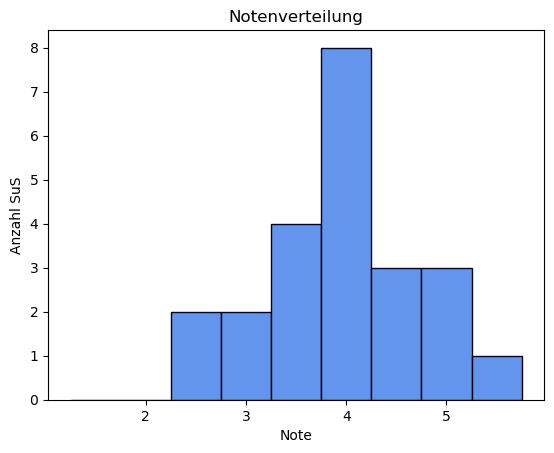

In dieser Übung zeichnen Sie ein Histogramm mit der Verteilung der
Körpergrössen der Schülerinnen und Schüler in Ihrer Klasse.

Hier folgt die Zelle zum Laden von PyTamaro in Google Colaboratory
(diese Zelle muss nur ausgeführt werden, wenn in Google Colaboratory
gearbeitet wird):

In [ ]:
! pip install pytamaro

## Listen in Python (Einführung)

Damit die
Körpergrössen in Python sinnvoll verarbeitet werden können, brauchen wir
die Datenstruktur *Liste*.

In Python können Listen dazu verwendet werden, einer Variabel mehrere Werte
zuzuweisen. Die Werte behalten dabei grundsätzlich ihre ursprüngliche
Reihenfolge bei.

### Listen erstellen

Am einfachsten werden Listen durch die Eingabe von konkreten Werten des
betrachteten Datentypen erstellt. Dazu werden die
Werte der Liste durch Kommas getrennt in eckigen Klammern geschrieben:

In [2]:
numbers = [1, 8, 3]
print(numbers)
vegetables = ['Spinat', 'Sellerie', 'Blumenkohl']
print(vegetables)

[1, 8, 3]
['Spinat', 'Sellerie', 'Blumenkohl']


### Auf Elemente einer Liste zugreifen

Die Elemente einer Liste sind geordnet und indexiert. Geordnet heisst,
dass die Liste die Reihenfolge der Elemente so behält, wie sie erstellt
wird - zumindest solange die Liste nicht verändert wird. Indexiert
heisst, dass jedes Element einer Liste eine Nummer erhält. Allerdings
beginnt man mit Null zu zählen. Das bedeutet, dass der `Sellerie` in der
Liste `vegetables`den Index `1` hat. 

Um das zweite Element der Liste auszugeben, muss Python nach dem Element
mit dem Index `1` der entsprechenden Liste gefragt werden:

In [3]:
print(vegetables[1])

Sellerie


### List Comprehension

Listen können auch mit einer sogenannten *list comprehension* erstellt werden.

In [1]:
example_numbers = [i for i in range(1,21)]
print(example_numbers)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


Eine *list comprehension* funktioniert ähnlich, wie die Beschreibung
einer Menge in 
der Mathematik ($\{x \in \mathbb{N} \mid \color{red} 1 \geq x > 21\color{black}\}$).

Der Teil

```Python
for i in range(1,21)
```
entspricht dabei der Bedingung (oben rot dargestellt) in der Beschreibung einer Menge. `1` ist
der Startwert für den Zähler `i` und 21 die obere Grenze.

### Über Listen iterieren

Listen sind nützliche Datenstrukturen, weil sie Element für Element durchlaufen werden
können. Dabei kann jedes einzelne Element als Parameter einer Funktion
übergeben werden.

Dies kann mit Hilfe einer `for`-Schleife erfolgen. Als Beispiel werden
alle Werte der Liste `example_numbers` quadriert.


In [7]:
for i in range(20):
    print(example_numbers[i] ** 2)

1
4
9
16
25
36
49
64
81
100
121
144
169
196
225
256
289
324
361
400


Diese Schreibweise erfordert, dass wir wissen, wie lange die zu
bearbeitende Liste ist.

Python stellt eine Vereinfachung zur Verfügung. Dabei wird Element für
Element immer der gleichen Variabel zugewiesen. Die gewünschte Operation
wird dann mit dieser Variabel durchgeführt. Die entsprechende Syntax
zeigt das folgende Beispiel.

In [2]:
for example in example_numbers:
    print(example ** 2)

1
4
9
16
25
36
49
64
81
100
121
144
169
196
225
256
289
324
361
400


Es hat sich eingebürgert, für Listen Namen von Variablen im Plural zu
wählen. Dann können die einzelnen Elemente im Singular bezeichnet
werden. Dies ist jedoch reine Konvention und technisch nicht
erforderlich. Um das zu zeigen, findet sich unten ein Beispiel, das sich
*nicht* an diese Konvention hält. Dazu wird die Liste `example_numbers` zuerst der Variablen $y$ zugewiesen.

In [3]:
y = example_numbers
for x in y:
    print(x ** 2)

1
4
9
16
25
36
49
64
81
100
121
144
169
196
225
256
289
324
361
400


### Leere Listen

Listen können auch leer sein. Eine leere Liste wird folgendermassen
erstellt: 

In [ ]:
leere_liste = []

### Listen ergänzen

Wenn einer bestehenden Liste ein Element angefügt werden soll, stellt
Python die Funktion `listenname.append(Element)` zur Verfügung.

In [6]:
ein_paar_elemente = [2, 5, 1]
print(ein_paar_elemente)
ein_paar_elemente.append(7)
print(ein_paar_elemente)

[2, 5, 1]
[2, 5, 1, 7]


## Anwendung

### Erstellen einer Liste aus ihren Elementen

Als nächstes nehmen Sie die gemessenen Grössen in der Klasse in eine
Liste `measurements` auf. Die entsprechenden Werte finden Sie im File
[Koerpergroessen.CSV](Koerpergroessen.CSV). Berücksichtigen Sie dabei,
dass nicht alle vorhandenen Daten in der richtigen Form vorliegen.

In [7]:
measurements = [179, 160, 167, 180, 169, 175, 177, 182, 161, 166, 
                177, 179, 178, 172, 170, 164, 155, 171, 173, 161, 
                185, 158, 169, 172, 170, 175]

### Einteilung der Daten in Intervalle

Damit aus der Liste der Körpergrössen ein Histogramm gezeichnet werden
kann, müssen die Körpergrössen in Intervalle (engl. bin) eingeteilt werden
und die Elemente einer Klasse gezählt werden.

Für das vorliegende Histogramm sollen die Körpergrössen in Intervalle
mit 5cm Abstand eingeteilt werden. Das heisst, ein Intervall sind zum
Beispiel alle Werte von 160cm bis 164cm.

Als Beispiel sehen Sie in der folgenden Zelle eine Schleife, die einmal über alle
Grössen iteriert und dabei zählt, wie viele Werte zwischen 160cm bis 164cm liegen.

In [14]:
bin_160_bis_164 = 0
for measure in measurements:
    if measure >= 160 and measure < 165:
        bin_160_bis_164 += 1

print(bin_160_bis_164)

4


### `if`-Statement

Dieses Code Snippet führt eine Bedingung ein.
Bedingungen oder
sogenannte `if`-Statements stellen sicher, dass bestimmter Code nur
ausgeführt wird, wenn die Bedingung, die geprüft wird, eingehalten wird. Im
Beispiel werden zwei Bedingungen geprüft, die kumulativ erfüllt sein
müssen (erste Bedinung `measure >= 160`, zweite Bedingung
`measure < 165`). Das heisst, wenn beide Bedingungen erfüllt sind, wird
`bin_160_bis_164 += 1` ausgeführt. Dies ist eine Kurzschreibweise für
`bin_160_bis_164 = bin_160_bis_164 + 1`. Es wird also jedesmal, wenn die Bedingung erfüllt ist, `bin_160_bis_164` um 1 hochgezählt.

Damit dies für alle 5-cm-Klassen in der Liste verallgemeinert werden kann, muss der kleinste und der grösste Wert der Liste bekannt sein.

Das Minimum einer Liste kann folgendermassen ermittelt werden:

In [15]:
def get_minimum(input : list[int]) -> int:
    minimum = input[0]

    for value in input:
        if value < minimum:
            minimum = value

    return minimum

print(get_minimum(measurements))

155


Schreiben Sie eine vergleichbare Funktion, die das Maximum einer Liste ausgibt.

In [16]:
def get_maximum(input : list[int]) -> int:
    maximum = input[0]

    for value in input:
        if value > maximum:
            maximum = value

    return maximum
print(get_maximum(measurements))

185


### Vertiefung `if`-Statements

Um die Möglichkeiten, welche `if`-Statements bieten, noch etwas weiter zu
illustrieren, finden Sie in der nächsten Zelle eine Schleife, welche
gerade Zahlen quadriert und ungerade mit drei potenziert. Falls statt
einer Zahl ein anderer Datentyp auftaucht, wird der String `unzulässiger
Input` in die Liste der Resultate eingetragen.

In [17]:
demo_list = [1, 2, 3, 4, 5, 'hallo', 7, 8, 9]

def if_demo(numbers : list[int]) -> list[int]:
    results = []
    for number in numbers:
        if type(number) != int:
            results.append('unzulässiger Input')
        elif number % 2 == 0:
            results.append(number ** 2)
        else:
            results.append(number ** 3)
    return results

print(if_demo(demo_list))

[1, 4, 27, 16, 125, 'unzulässiger Input', 343, 64, 729]


Das Beispiel `if_demo()` sieht als Flussdiagramm dargestellt folgendermassen aus:


<img src="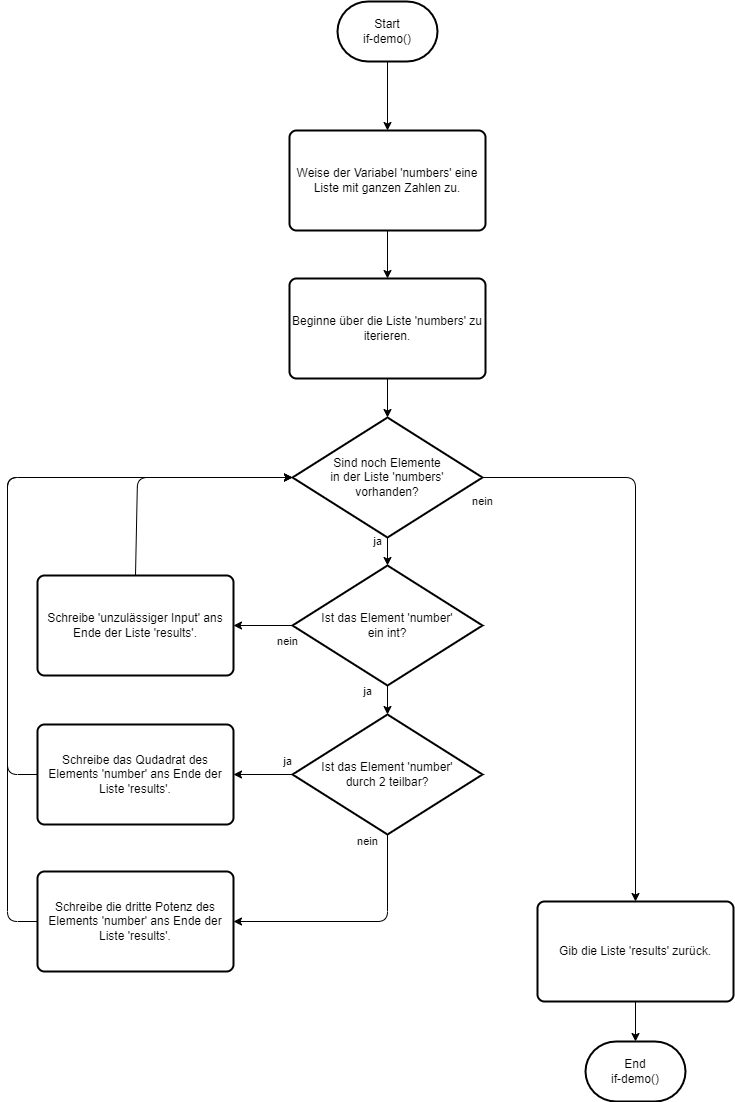>

Als Struktogramm sieht das Beispiel `if-demo()` folgendermassen aus:

![`if-demo()` als Struktogramm](struktogram.png)

In diesem Beispiel bedeutet `!=` **nicht**. Es wird
geprüft, ob `number` vom Typ `int` ist, wenn dies nicht der Fall ist, wird
in der Resultatliste `unzulässiger Input` eingetragen. Mit `elif` wird
eine zweite Bedingung geprüft. Im Beispiel ob die Zahl ohne Rest durch 2
teilbar ist (`number % 2 == 0`). Damit Python zwischen einem Vergleich
und einer Zuweisung unterscheiden kann, wird bei Vergleichen ein
doppeltes Gleichheitszeichen verwendet. Falls keine der beiden geprüften
Bedingungen erfüllt ist, wird mit `else` angezeigt, was mit dem Rest der
Fälle zu geschehen habe.

Aus den obigen Beispielen geht implizit hervor, dass sowohl `elif` wie
auch `else` optional sind. Mit `elif` werden die Bedinungen $2, 3, ...,
n$ eingefügt. Weil mit `else` das *default* verhalten festgelegt wird,
kann `else` nur einmal vorkommen.

### Systemeigene Python Funktion `min()` und `max()`

Dass das Minimum oder das Maximum aus einer Liste mit Werten gesucht wird, ist relativ häufig.
Python stellt daher eine systemeigene Funktion `min()` und `max()` zur Verfügung, welche das Miniumum bzw. das Maximum einer Liste ausgeben. Trotzdem war das eine gute Fingerübung, um sich mit der
Funktion von Bedingungen vertraut zu machen.

### Zählen der Werte für die einzelnen Klassen

Nun sollten Sie in der Lage sein, den Beispiel-Code für die Grössen
zwischen 160cm und 164cm zu verallgemeinern, so dass die
ganze Liste der Körpergrössen in 5cm Bins "abgefüllt" wird.

Hinweis: Die einzelnen Bins sind ihrerseits Elemente einer Liste.

In [18]:
def measure_to_bin(measurements : list[int]) -> list[float]:
    bins = []
    total = len(measurements)
    lower_end = min(measurements) // 5 * 5
    upper_end = max(measurements) // 5 * 5 + 5
    counter = 0

    for i in range(lower_end, upper_end, 5):
        for measure in measurements:
            if measure >= i and measure < i + 5:
                counter += 1
        bins.append(counter)
        counter = 0

    return bins

zahlen = measure_to_bin(measurements)

print(measure_to_bin(measurements))

[2, 4, 4, 6, 7, 2, 1]


## Visualisierung

Die so gruppierten Werte können nun visualisiert werden. Dazu braucht es
eine Funktion, welche eine Liste als Parameter entgegennimmt und eine
Liste mit Grafiken (Rechtecken mit der entsprechenden Länge) zurückgibt.

### Histogramm mit PyTamaro

Die dafür nötigen PyTamaro Funktionen werden in der folgenden Zelle importiert.

In [19]:
from pytamaro.de import (rechteck, text, Grafik,
                         blau, schwarz, transparent, rgb_farbe,
                         fixiere, kombiniere, drehe, ueber, ueberlagere, neben,
                         unten_links, unten_rechts, oben_rechts, oben_links,
                         mitte_rechts, mitte_links, oben_mitte, unten_mitte,
                         zeige_grafik)

Mit Hilfe von PyTamaro kann nun eine Funktion geschrieben werden, die
Säulen mit fixer Breite und variabler Höhe in einer Liste ausgeben.

In [20]:
def create_pillars(heights : list[float]) -> list[Grafik]:
    fill_color = rgb_farbe(50, 255, 255)
    width = 10
    pillars = []

    for height in heights:
        contour = rechteck(width, height, schwarz)
        if height > 2:
            fill = rechteck(width - 2, height - 2, fill_color)
            pillar = ueberlagere(fill, contour)
        else:
            pillar = contour
        pillars.append(pillar)

    return pillars

saeulen = create_pillars(zahlen)

Abschliessend müssen die Säulen noch nebeneinander angeordnet werden.
Dazu werden die Funktionen `fixiere()` und `kombiniere()` verwendet.

In [21]:
def draw_histogram(pillars : list[Grafik]) -> Grafik:
    histogram = fixiere(unten_rechts, pillars[0])

    for i in range(1, len(pillars)):
        histogram = kombiniere(histogram, fixiere(unten_links, pillars[i]))
        histogram = fixiere(unten_rechts, histogram)

    return(histogram)

resultat = draw_histogram(saeulen)
zeige_grafik(resultat)

### Skalierung

Das Histogramm mit den absoluten, unbearbeiteten Zahlen ist etwas flach.
Entsprechend muss die Darstellung skaliert werden. Eine Lösung könnte
die Überhöhung der Werte sein. 

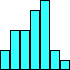

In [22]:
zahlen_ueberhoeht = [zahl * 10 for zahl in zahlen]
ueberhoehte_saeulen = create_pillars(zahlen_ueberhoeht)
histogram_ueberhoeht = draw_histogram(ueberhoehte_saeulen)

zeige_grafik(histogram_ueberhoeht)

Eine andere Variante ist die Arbeit mit relativen Werten. Die Zahlen in
den einzelnen Klassen werden in Prozenten ausgedrückt. Die Prozentwerte
werden dann als Histogramm dargestellt. Dies bietet den zusätzlichen Vorteil, dass
verschiedene Samples besser miteinander verglichen werden können.

In [23]:
zahlen_relativ = [zahl / sum(zahlen) * 100 for zahl in zahlen]
relative_saeulen = create_pillars(zahlen_relativ)
histogram_relativ = draw_histogram(relative_saeulen)

zeige_grafik(histogram_relativ)

Das ganze ist immer noch etwas klein. In einem nächsten Schritt kann
auch dieses Resultat noch skaliert werden.

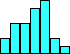

In [24]:
zahlen_relativ_ueberhoeht = [zahl / sum(zahlen) * 100 * 2 for zahl in zahlen]
ueberhoehte_relative_saeulen = create_pillars(zahlen_relativ_ueberhoeht)
histogram_relativ_ueberhoeht = draw_histogram(ueberhoehte_relative_saeulen)

zeige_grafik(histogram_relativ_ueberhoeht)

### Abschluss

Damit das Erstellen eines Histogramms für den Nutzer etwas komfortabler
möglich ist, sollen nun die einzelnen Funktionen so kombiniert werden,
dass einer Funktion eine Liste mit Werten übergeben werden kann und
diese dann ein Histogramm zurückgibt.

In [25]:
def get_histogram(values : list[float]) -> Grafik:
    bins = measure_to_bin(values)
    relative_hights = relativierung_mit_ueberhoehung(bins)
    pillars = create_pillars(relative_hights)
    histogram = draw_histogram(pillars)
    
    return histogram


def measure_to_bins(measurements : list[int]) -> list[float]:
    bins = []
    total = len(measurements)
    lower_end = min(measurements) // 5 * 5
    upper_end = max(measurements) // 5 * 5 + 5
    counter = 0

    for i in range(lower_end, upper_end, 5):
        for measure in measurements:
            if measure >= i and measure < i + 5:
                counter += 1
        bins.append(counter)
        counter = 0

    return bins

def relativierung_mit_ueberhoehung(bins : list[int]) -> list[float]:
    return[bin / sum(bins) * 100 * 2 for bin in bins]

def create_pillars(heights : list[float]) -> list[Grafik]:
    fill_color = rgb_farbe(50, 255, 255)
    width = 10
    pillars = []

    for height in heights:
        contour = rechteck(width, height, schwarz)
        if height > 2:
            fill = rechteck(width - 2, height - 2, fill_color)
            pillar = ueberlagere(fill, contour)
        else:
            pillar = contour
        pillars.append(pillar)

    return pillars

def draw_histogram(pillars : list[Grafik]) -> Grafik:
    histogram = fixiere(unten_rechts, pillars[0])

    for i in range(1, len(pillars)):
        histogram = kombiniere(histogram, fixiere(unten_links, pillars[i]))
        histogram = fixiere(unten_rechts, histogram)

    return(histogram)

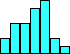

In [26]:
zeige_grafik(get_histogram(measurements))

## Ausblick auf weitere Arten der Datenvisualisierung

Weitere Formen der Datenvisualisierung werden im Lehrmittel *Informatik -
Data Science und Sicherheit: Grundlagen der Informatik für Schweizer
Maturitätsschulen*, Michael Barot et al., 1. Auflage Aufl., Baar 2022, im
Kapitel 6, *Aus Daten lernen*, dargestellt. Wertvolle Anregungen finden
sich insbesondere auch auf der Website des
[Data Viz Project](https://datavizproject.com/),
wo aufgezeigt wird, welche Form der Darstellung sich für welche Art von
Daten eignet.

Die Aufbereitung von datenlastigen Inhalten kann in Jupyter
Notebooks erfolgen. Dafür ist es nicht nötig, die Visualisierung von
Grund auf selber zu programmieren. In Pyhton stehen dafür Libraries wie
[pandas](https://pandas.pydata.org/)
oder
[matplotlib](https://matplotlib.org/)
zur Verfügung.